# Smart India Hackathon (2024)
## Problem Statement ID: 1655
### Detecting oil spills at marine environment using Automatic Identification System (AIS) and satellite datasets

### Data Acquisition: Real-time AIS information stored within a cloud storage database.

In [2]:
#!pip install firebase-admin

  Obtaining dependency information for firebase-admin from https://files.pythonhosted.org/packages/8a/68/ef35057415342fc14bdc5f7fc999d417de5a4efd25e1352d4df8e40cb628/firebase_admin-6.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachecontrol>=0.12.6 from https://files.pythonhosted.org/packages/a3/a9/7d331fec593a4b2953338df33e954aac6ff79eb5a073bca2783766bc7722/cachecontrol-0.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for pyjwt[crypto]>=2.5.0 from https://files.pythonhosted.org/packages/79/84/0fdf9b18ba31d69877bd39c9cd6052b47f3761e9910c15de788e519f079f/PyJWT-2.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for google-cloud-firestore>=2.9.1 from https://files.pythonhosted.org/packages/51/e3/ca8c7f4a40b28b78be441c3c4164f9501b714f3a9cc8fbafdf47b91da88e/google_cloud_firestore-2.18.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for grpcio-status<2.0.dev0,>=1.33.2 from https://files.pythonhosted.org/packages/77

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.25.4 which is incompatible.


In [1]:
import asyncio #Asynchronous I/O for concurrent monitoring of geographic zone.
import json
from datetime import datetime, timezone
import websockets
import firebase_admin
from firebase_admin import credentials, firestore

# Initializing Firebase Admin SDK
cred = credentials.Certificate(
    r'C:\Users\Rishav Das\OneDrive\Documents\ais-project-b0480-firebase-adminsdk-fm40q-f752c7deb3.json')
firebase_admin.initialize_app(cred)
db = firestore.client()

async def connect_ais_stream():
    while True:  # Infinite loop to keep trying to reconnect
        try:
            async with websockets.connect("wss://stream.aisstream.io/v0/stream") as websocket:
                subscribe_message = {
                    "APIKey": "e4b8b74e9c66ad37638e3f4d961170a94ff0a25d",
                    "BoundingBoxes": [[[25.7, -80.3], [25.8, -80.1]]],  # Bounding box for Mumbai Port
                    #"FiltersShipMMSI": ["368207620", "367719770", "211476060"],  # Optional: Filter by ship MMSI
                    #"FilterMessageTypes": ["PositionReport"]  # Optional: Filter by message type
                }

                subscribe_message_json = json.dumps(subscribe_message)
                await websocket.send(subscribe_message_json)

                async for message_json in websocket:
                    try:
                        message = json.loads(message_json)
                        print(f"Received message: {message}")  # Debugging line

                        # "Message Type" key within JSON output
                        if "MessageType" in message:
                            message_type = message["MessageType"]

                            if message_type == "PositionReport":
                                ais_message = message['Message']['PositionReport']
                                timestamp = datetime.now(timezone.utc).isoformat()
                                ship_id = ais_message['UserID']
                                latitude = ais_message['Latitude']
                                longitude = ais_message['Longitude']

                                # Print the data to console
                                print(f"[{timestamp}] ShipId: {ship_id} Latitude: {latitude} Longitude: {longitude}")

                                # Send data to Firestore
                                doc_ref = db.collection('ais_data').document()
                                doc_ref.set({
                                    "Timestamp": timestamp,
                                    "ShipId": ship_id,
                                    "Latitude": latitude,
                                    "Longitude": longitude
                                })
                        else:
                            print("Message does not contain 'MessageType' key.")  # Debugging line

                    except json.JSONDecodeError as e:
                        print(f"Failed to decode JSON: {e}")  # Handle JSON decoding errors
                    except KeyError as e:
                        print(f"KeyError: {e}")  # Handle KeyError exceptions
                    except Exception as e:
                        print(f"Unexpected error: {e}")  # Handle other unexpected exceptions

        except websockets.ConnectionClosedError as e:
            print(f"WebSocket connection closed with error: {e}")
        except Exception as e:
            print(f"Unexpected error: {e}")

        print("Attempting to reconnect in 5 seconds...")
        await asyncio.sleep(5)  # Waiting before trying to reconnect

if __name__ == "__main__":
    # Running the event loop concurrently
    await connect_ais_stream()

Received message: {'Message': {'StaticDataReport': {'MessageID': 24, 'PartNumber': False, 'RepeatIndicator': 0, 'ReportA': {'Name': 'DAY ONE', 'Valid': True}, 'ReportB': {'CallSign': '', 'Dimension': {'A': 0, 'B': 0, 'C': 0, 'D': 0}, 'FixType': 0, 'ShipType': 0, 'Spare': 0, 'Valid': False, 'VenderIDModel': 0, 'VenderIDSerial': 0, 'VendorIDName': ''}, 'Reserved': 0, 'UserID': 368332130, 'Valid': True}}, 'MessageType': 'StaticDataReport', 'MetaData': {'MMSI': 368332130, 'MMSI_String': 368332130, 'ShipName': 'DAY ONE', 'latitude': 25.785751666666666, 'longitude': -80.16539166666666, 'time_utc': '2024-09-07 15:07:45.208392338 +0000 UTC'}}
Received message: {'Message': {'ShipStaticData': {'AisVersion': 2, 'CallSign': 'WBO8586', 'Destination': 'MIAMI               ', 'Dimension': {'A': 10, 'B': 54, 'C': 5, 'D': 9}, 'Dte': False, 'Eta': {'Day': 14, 'Hour': 14, 'Minute': 30, 'Month': 9}, 'FixType': 1, 'ImoNumber': 9043847, 'MaximumStaticDraught': 4, 'MessageID': 5, 'Name': 'FLORIDA RESPONDER  

CancelledError: 

### Data Acquisition - Sentinel 1 (Copernicus Space Mission) Satellite Imagery

In [ ]:
#!pip install asf_search

In [15]:
#!pip install earthengine-api shapely geemap

In [1]:
import ee

In [2]:
ee.Authenticate()

True

In [3]:
ee.Initialize(project='ee-chowdhurysrijan2004')

In [4]:
# Example AOI: Mumbai Coast / WKT->GEOJSON Conversion
from shapely import wkt
aoi_geo=wkt.loads('POLYGON ((31.50873161171151 31.97266003364004, 31.50873161171151 31.16426284776098, 32.601804570463116 31.16426284776098, 32.601804570463116 31.97266003364004, 31.50873161171151 31.97266003364004))')
aoi_gjson=aoi_geo.__geo_interface__
aoi = ee.Geometry(aoi_gjson)

In [5]:
# Filtering the Sentinel-1 collection
sentinel1 = ee.ImageCollection('COPERNICUS/S1_GRD') \
    .filter(ee.Filter.eq('instrumentMode', 'IW'))  \
    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV+VH')) \
    .filterBounds(aoi) \
    .filterDate('2020-08-10', '2020-08-11')  # Change dates

In [6]:
# Initialize the Earth Engine library.
ee.Initialize()

# Define the area of interest (Kuwait Al Khiran).
#region = aoi
region = ee.Geometry.Point([48.2764, 28.6173])  # Example coordinates

# Define the time range.
start_date = '2017-08-09'
end_date = '2017-08-12'
sentinel1 = ee.ImageCollection('COPERNICUS/S1_GRD') \
    .filterBounds(region) \
    .filterDate(start_date, end_date) \
    .filter(ee.Filter.eq('instrumentMode', 'IW')) \
    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV')) \
    .filter(ee.Filter.eq('resolution_meters', 10))
vv_band = sentinel1.select('VV')

# Printing the number of images found.
image_count = vv_band.size().getInfo()
print(f'Number of images found: {image_count}')

# Getting the first image in the collection.
first_image = vv_band.first()
first_image_info = first_image.getInfo()
print(first_image_info)

Number of images found: 1
{'type': 'Image', 'bands': [{'id': 'VV', 'data_type': {'type': 'PixelType', 'precision': 'double'}, 'dimensions': [28641, 21043], 'crs': 'EPSG:32638', 'crs_transform': [10, 0, 621659.7117167505, 0, -10, 3263777.4715941967]}], 'version': 1725686537225534, 'id': 'COPERNICUS/S1_GRD/S1A_IW_GRDH_1SDV_20170810T024714_20170810T024738_017855_01DEF7_F48C', 'properties': {'SNAP_Graph_Processing_Framework_GPF_vers': '6.0.4', 'SLC_Processing_facility_org': 'ESA', 'SLC_Processing_facility_country': 'United Kingdom', 'GRD_Post_Processing_facility_org': 'ESA', 'transmitterReceiverPolarisation': ['VV', 'VH'], 'GRD_Post_Processing_start': 1502346748300, 'sliceNumber': 13, 'GRD_Post_Processing_facility_name': 'Copernicus S1 Core Ground Segment - UPA', 'resolution': 'H', 'SLC_Processing_facility_name': 'Copernicus S1 Core Ground Segment - UPA', 'system:footprint': {'type': 'LinearRing', 'coordinates': [[49.131620847031925, 29.02304926312688], [49.13232085365085, 29.0268766565584

In [7]:
import geemap
Map = geemap.Map(center=[28.6173, 48.2764], zoom=10)
# Adding the sar image generated as a layer 
Map.addLayer(first_image, {'min': -25, 'max': 5}, 'Sentinel-1 VV')
Map

No such comm: ebf501afacd743c4a733ff032d2fdf84
No such comm: ebf501afacd743c4a733ff032d2fdf84
No such comm: ebf501afacd743c4a733ff032d2fdf84
No such comm: ebf501afacd743c4a733ff032d2fdf84
No such comm: ebf501afacd743c4a733ff032d2fdf84
No such comm: ebf501afacd743c4a733ff032d2fdf84
No such comm: ebf501afacd743c4a733ff032d2fdf84


Map(center=[28.6173, 48.2764], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDa…

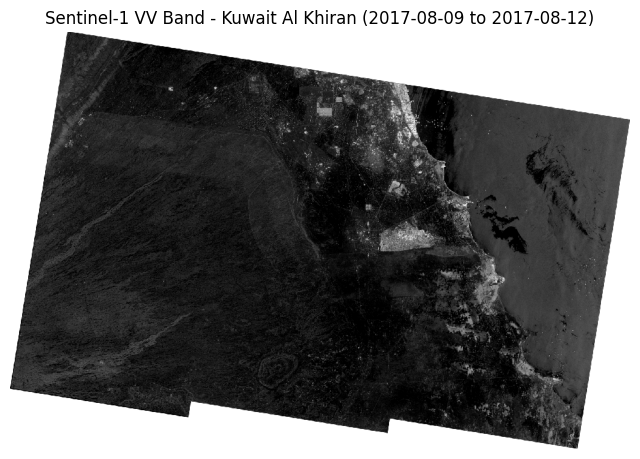

In [8]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import requests
from io import BytesIO

# Selecting the VV band.
vv_band = sentinel1.select('VV')

# Getting the first image in the collection.
first_image = vv_band.first()
vis_params = {
    'min': -25,
    'max': 5,
    'dimensions': 1024,  # Increased dimensions for higher resolution
    'format': 'png'
}

# Geting the image URL for direct visualization.
url = first_image.getThumbURL(vis_params)

# Downloading the image.
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Correct the orientation if needed (e.g., rotate by 270 degrees if it's upside down)
image = ImageOps.exif_transpose(image)

# Display the image using matplotlib.
plt.figure(figsize=(8, 8))  # Adjusted figure size for better resolution
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Sentinel-1 VV Band - Kuwait Al Khiran (2017-08-09 to 2017-08-12)')
plt.show()


### Sentinel-1 SAR Imagery Pre-processing and Oil Spill Masking

### Passing all images through auto-encoder for image generation & feature extraction

In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import pandas as pd

# Step 1: Load Data
def load_data(image_dir):
    image_files = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
    return image_files

# Step 2: Split Data into Training and Validation Sets
def split_data(image_files, test_size=0.2):
    train_files, val_files = train_test_split(image_files, test_size=test_size, random_state=42)
    return train_files, val_files

def create_generators(train_files, val_files, batch_size=16, target_size=(256, 256)):
    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': train_files}),
        directory=None,
        x_col='filename',
        y_col=None,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='input',
        color_mode='grayscale',
        shuffle=True
    )

    val_generator = val_datagen.flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': val_files}),
        directory=None,
        x_col='filename',
        y_col=None,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='input',
        color_mode='grayscale',
        shuffle=False
    )
    
    return train_generator, val_generator

# Step 4: Build the Autoencoder Model
def build_autoencoder(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # Bottleneck
    encoded = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    
    # Decoder
    x = layers.Conv2DTranspose(256, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    return models.Model(inputs, decoded)

# Step 5: Training
def compile_and_train(autoencoder, train_generator, val_generator, epochs=50):
    autoencoder.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='mse')
    
    history = autoencoder.fit(
        train_generator,
        validation_data=val_generator,
        epochs=epochs,
        steps_per_epoch=len(train_generator),
        validation_steps=len(val_generator)
    )
    
    return history

# Main Procedure
image_dir = 'C:\\Users\\chowd\\Downloads\\sentinel-20240906T143803Z-001\\sentinel'  # Replace with the path to your training data
input_shape = (256, 256, 1)  # Assuming grayscale images

image_files = load_data(image_dir)
train_files, val_files = split_data(image_files)
train_generator, val_generator = create_generators(train_files, val_files, batch_size=16, target_size=input_shape[:2])

autoencoder = build_autoencoder(input_shape)
autoencoder.summary()

history = compile_and_train(autoencoder, train_generator, val_generator, epochs=3)


Found 5366 validated image filenames.
Found 1342 validated image filenames.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)         │ (None, 256, 256, 1)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_5 (Conv2D)                  │ (None, 256, 256, 64)          │         640 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_3 (MaxPooling2D)     │ (None, 128, 128, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_6 (Conv2D)                  │ (None, 128, 128, 128)         │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_4 (MaxPooling2D)     │ (None, 64, 64, 128)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_7 (Conv2D)                  │ (None, 64, 64, 256)           │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_5 (MaxPooling2D)     │ (None, 32, 32, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_8 (Conv2D)                  │ (None, 32, 32, 512)           │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_transpose_3                 │ (None, 32, 32, 256)           │   1,179,904 │
│ (Conv2DTranspose)                  │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ up_sampling2d_3 (UpSampling2D)     │ (None, 64, 64, 256)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_transpose_4                 │ (None, 64, 64, 128)           │     295,040 │
│ (Conv2DTranspose)                  │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ up_sampling2d_4 (UpSampling2D)     │ (None, 128, 128, 128)         │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_transpose_5                 │ (None, 128, 128, 64)          │      73,792 │
│ (Conv2DTranspose)                  │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ up_sampling2d_5 (UpSampling2D)     │ (None, 256, 256, 64)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_9 (Conv2D)                  │ (None, 256, 256, 1)           │         577 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 3,099,137 (11.82 MB)

 Trainable params: 3,099,137 (11.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


C:\Users\chowd\AnacondaNew\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


336/336 ━━━━━━━━━━━━━━━━━━━━ 2800s 8s/step - loss: 0.0473 - val_loss: 0.0091
Epoch 2/3


C:\Users\chowd\AnacondaNew\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


336/336 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/3
336/336 ━━━━━━━━━━━━━━━━━━━━ 2545s 8s/step - loss: 0.0089 - val_loss: 0.0079


In [5]:
autoencoder.save('autoencoder_partial.keras')

In [10]:
#<----------TESTING DATA-------->
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir = 'C:\\Users\\chowd\\Downloads\\sentinel-20240906T143803Z-001'

#Test data image denoising and speckle filtering
test_datagen = ImageDataGenerator(rescale=1./255)

# Passing through test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256), 
    batch_size=1,  # Predict one image at a time
    class_mode=None,  # No labels for the test data
    color_mode='grayscale',  # Since SAR images
    shuffle=False  
)


Found 839 images belonging to 1 classes.


In [11]:
# Loading the saved model
autoencoder = tf.keras.models.load_model('autoencoder_partial.keras')

# Predicting on the test images
predictions = autoencoder.predict(test_generator, steps=len(test_generator))

# predictions will be an array of images (same size as input)


839/839 ━━━━━━━━━━━━━━━━━━━━ 91s 108ms/step


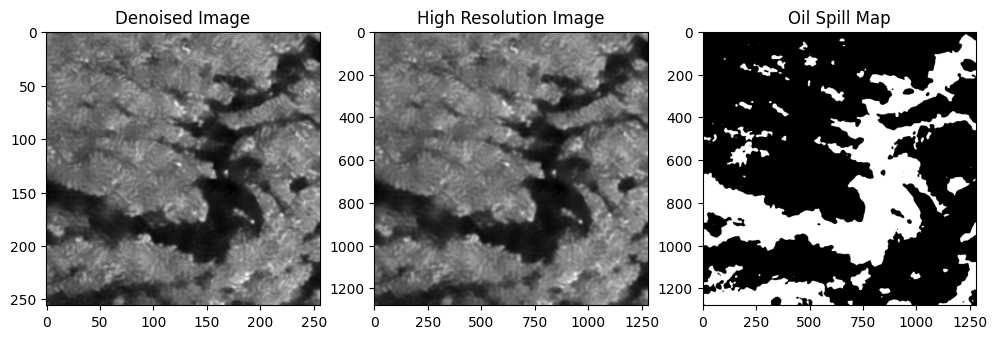

In [14]:
import numpy as np
import cv2
from skimage import restoration
from skimage.transform import rescale
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

def denoise_image(image):
    """ Applying speckle filtering to remove small black dots """
    denoised = restoration.denoise_nl_means(image, patch_size=5, patch_distance=6, h=0.1)
    return denoised

def increase_resolution(image, scale_factor):
    """ Increasing image resolution using rescaling """
    scaled_image = rescale(image, scale_factor, mode='reflect', anti_aliasing=True)
    return scaled_image

def map_oil_spills(image):
    """ Mapping whole area as black and oil spills as white """
    # Otsu's thresholding to find the threshold for binarization
    thresh = threshold_otsu(image)
    # Binarizing the image
    binary_image = image > thresh
    # Inverting the binary image (oil spills are white, everything else is black)
    mapped_image = np.invert(binary_image).astype(np.uint8) * 255
    return mapped_image

def process_image(input_file, scale_factor=5.0):
    """ Main function to process the SAR image """
    # image load
    image = cv2.imread(input_file, cv2.IMREAD_GRAYSCALE)
    
    # Denoising the image using speckle filtering
    denoised_image = denoise_image(image)
    
    # Increasing resolution
    high_res_image = increase_resolution(denoised_image, scale_factor)
    
    # Mapping oil spills
    oil_spill_map = map_oil_spills(high_res_image)
    
    # Saving processed images
    cv2.imwrite('denoised_image.png', (denoised_image * 255).astype(np.uint8))  # Convert to 8-bit image for saving
    cv2.imwrite('high_res_image.png', (high_res_image * 255).astype(np.uint8))  # Convert to 8-bit image for saving
    cv2.imwrite('oil_spill_map.png', oil_spill_map)
    
    # Plotting results
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.title('Denoised Image')
    plt.imshow(denoised_image, cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.title('High Resolution Image')
    plt.imshow(high_res_image, cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.title('Oil Spill Map')
    plt.imshow(oil_spill_map, cmap='gray')
    
    plt.show()

if __name__ == "__main__":
    input_file = 'C:\\Users\\chowd\\Downloads\\sentinel-20240906T143803Z-001\\test\\20557_sat.jpg'  # Replace with your SAR image file
    process_image(input_file)
